# Some stats
## Mise en place

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import Levenshtein

%matplotlib widget

In [3]:
data = pd.read_csv("data/books.csv")
data.columns

Index(['bookId', 'title', 'series', 'author', 'rating', 'description',
       'language', 'isbn', 'genres', 'characters', 'bookFormat', 'edition',
       'pages', 'publisher', 'publishDate', 'firstPublishDate', 'awards',
       'numRatings', 'ratingsByStars', 'likedPercent', 'setting', 'coverImg',
       'bbeScore', 'bbeVotes', 'price'],
      dtype='object')

In [40]:
data

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",...,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",...,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52473,11492014-fractured,Fractured,Fateful #2,Cheri Schmidt (Goodreads Author),4.00,The Fateful Trilogy continues with Fractured. ...,English,2940012616562,"['Vampires', 'Paranormal', 'Young Adult', 'Rom...",[],...,NaN,[],871,"['311', '310', '197', '42', '11']",94.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,NaN
52474,11836711-anasazi,Anasazi,Sense of Truth #2,Emma Michaels,4.19,"'Anasazi', sequel to 'The Thirteenth Chime' by...",English,9999999999999,"['Mystery', 'Young Adult']",[],...,August 3rd 2011,[],37,"['16', '14', '5', '2', '0']",95.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,NaN
52475,10815662-marked,Marked,Soul Guardians #1,Kim Richardson (Goodreads Author),3.70,--READERS FAVORITE AWARDS WINNER 2011--Sixteen...,English,9781461017097,"['Fantasy', 'Young Adult', 'Paranormal', 'Ange...",[],...,March 15th 2011,"[""Readers' Favorite Book Award (2011)""]",6674,"['2109', '1868', '1660', '647', '390']",84.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,7.37
52476,11330278-wayward-son,Wayward Son,NaN,"Tom Pollack (Goodreads Author), John Loftus (G...",3.85,A POWERFUL TREMOR UNEARTHS AN ANCIENT SECRETBu...,English

## Publishers
We know that the data is not very clean. Publishers for example have some quasi-duplicates e.g. `集英社` and `集英社 / Shūeisha` which both refer to the same Japanese publishing company.

In [5]:
pubs = data["publisher"].drop_duplicates().sort_values()

def n_shifted(series, n):
    ret = [series]
    for i in range(n):
        ret.append(ret[-1].shift())
    return ret

def make_series(how_many_neighbours):
    return pd.concat(n_shifted(pubs, how_many_neighbours), axis=1).dropna()

def similarity(row):
    return Levenshtein.ratio(row[0], Levenshtein.median(row))

similarity = pd.DataFrame(
    {i: make_series(i).apply(similarity, axis=1) for i in range(1, 25)}
)
similarity

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
0,0.812500,0.866667,0.774194,0.812500,0.774194,0.774194,0.758621,0.758621,0.758621,0.758621,...,0.733333,0.733333,0.733333,0.733333,0.709677,0.733333,0.733333,0.733333,0.687500,0.733333
1,0.965517,0.965517,0.965517,0.933333,0.838710,0.838710,0.774194,0.758621,0.758621,0.758621,...,0.733333,0.709677,0.709677,0.709677,0.709677,0.709677,0.709677,0.857143,0.857143,0.857143
2,0.984127,1.000000,0.892308,0.892308,0.892308,0.716981,0.740741,0.705882,0.693878,0.693878,...,0.666667,0.666667,0.666667,0.666667,0.638298,0.553191,0.553191,0.521739,0.510638,0.468085
3,0.620690,0.692308,0.666667,0.571429,0.642857,0.545455,0.545455,0.545455,0.538462,0.521739,...,0.521739,0.521739,0.521739,0.454545,0.480000,0.480000,0.400000,0.400000,0.400000,0.461538
4,0.869565,0.869565,0.888889,0.863636,0.863636,0.755556,0.761905,0.681818,0.697674,0.697674,...,0.714286,0.772727,0.731707,0.731707,0.731707,0.731707,0.731707,0.731707,0.731707,0.731707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52471,0.689655,0.333333,0.482759,0.444444,0.413793,0.444444,0.400000,0.428571,0.444444,0.413793,...,0.380952,0.380952,0.380952,0.347826,0.380952,0.347826,0.347826,0.347826,0.380952,0.400000
52472,0.977778,0.977778,0.904762,0.606061,0.529412,0.484848,0.571429,0.437500,0.444444,0.486486,...,0.363636,0.363636,0.400000,0.352941,0.352941,0.352941,0.303030,0.444444,0.400000,0.400000
52473,0.740741,0.500000,0.303030,0.266667,0.303030,0.303030,0.388889,0.352941,0.363636,0.363636,...,0.387097,0.363636,0.363636,0.333333,0.387097,0.363636,0.370370,0.375000,0.344828,0.375000
52476,0.800000,0.529412,0.514286,0.500000,0.484848,0.500000,0.540541,0.533333,0.413793,0.411765,...,0.444444,0.400000,0.400000,0.413793,0.413793,0.294118,0.333333,0.333333,0.294118,0.352941


In [114]:
cm = matplotlib.cm.get_cmap("viridis", 8)
colors = [cm(x) for x in np.linspace(0, 1, len(similarity.columns))]

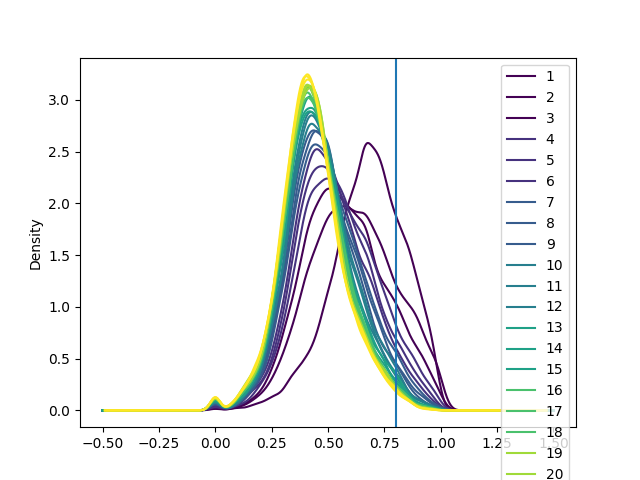

In [126]:
plt.close()
ax = similarity.plot.density(color=colors)
ax.axvline(x=0.8)
plt.show()

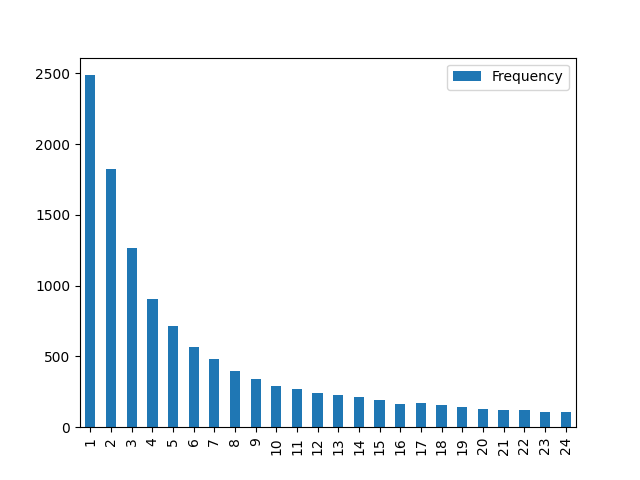

In [116]:
plt.close()
sums = pd.DataFrame((similarity > 0.8).astype(int).sum(), columns=["Frequency"])
sums.plot.bar()
plt.show()

To show that the `publisher` column contains quasi-duplicates, we sort the column by value so that quasi-duplicates sharing a prefix will land close together. 

Then, we compute the Levenshtein-ratio similarity measure between a publisher and the next N publishers in the sorted column. Because we sorted the list, it is very likely that two or three contiguous publishers will be very similar, without this being really useful. So, we try many bigger values of N.

The first graph shows the density of the similarity for different values of N.
The second one shows the frequency of publishers which are very (>80% similarity ratio) similar to their N neighbours. 

While we did not make measures for N that were too big, it can be seen that, out of the 11109 rows of the frame, there is still about 100 (so 1%) that is really similar to its 24 next neighbours. This would be quite unexpected had the column contained no quasi-duplicates.

---

Let's see the publishers' distribution, anyway. Keeping in mind that the quasi-duplicates will make us underestimate counts.

There are 11111 publishers.


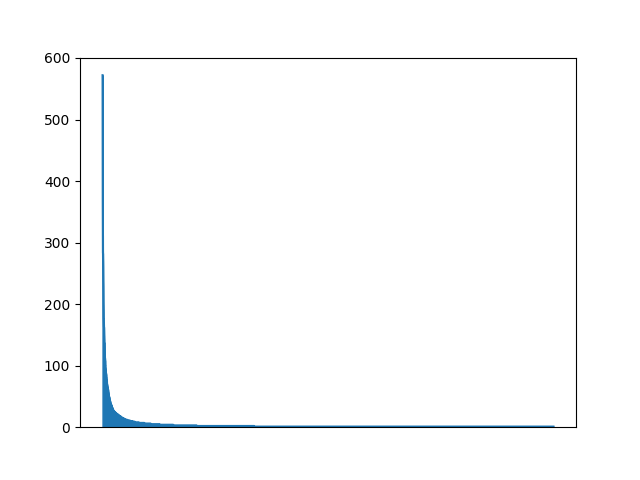

Vintage                                        572
HarperCollins                                  563
Penguin Books                                  430
Ballantine Books                               399
Bantam                                         369
Createspace Independent Publishing Platform    367
Pocket Books                                   314
Avon                                           311
Berkley                                        287
Del Rey                                        284
Tor Books                                      283
Penguin Classics                               282
HarperTeen                                     274
Simon Pulse                                    270
Grand Central Publishing                       263
St. Martin's Press                             238
Little, Brown Books for Young Readers          234
Harper Perennial                               229
Signet                                         206
Penguin                        

In [125]:
pubs2 = data["publisher"].astype("category")
print(f"There are {len(pubs2.drop_duplicates())} publishers.")

plt.close()
ax = pubs2.value_counts().plot.area()
ax.get_xaxis().set_visible(False)
plt.show()

pubs2.value_counts().sort_values(ascending=False).head(30)

Here we see a rather sharp decrease in frequency through the first 30 publishers, by about 5x.

## Setting
Another interesting column is `setting`. It contains a list of places where the book's action happens. Is the distribution of all places heavy-tailed?

In [94]:
import ast

def to_list(string):
     return ast.literal_eval(string)

settings = data["setting"].map(to_list)  # the original column contains strings. we want lists.
settings = settings.explode().dropna().astype("category")
settings

0                                       District 12, Panem
0                                           Capitol, Panem
0                                    Panem (United States)
1        Hogwarts School of Witchcraft and Wizardry (Un...
1                                          London, England
                               ...                        
52440                                          Afghanistan
52441              Los Angeles, California (United States)
52444                                         South Africa
52470                           West Texas (United States)
52472                  Port Fare, New York (United States)
Name: setting, Length: 17365, dtype: category
Categories (4124, object): ['  (Pakistan)', ''glantine', '667 Dark Avenue', 'Aarau, Aargau (Switzerland)', ..., 'سوريا (Syrian Arab Republic)', 'مكتبة رحاب- ساحة بورسعيد - الجزائر - الجزائر ..., '內蒙古 (China)', '松本 (Japan)']

There are 4124 settings.


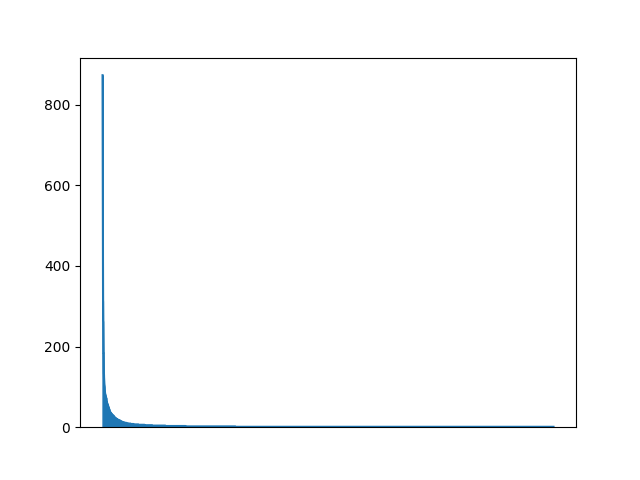

United States of America                     873
London, England                              723
New York City, New York (United States)      544
England                                      316
United Kingdom                               312
Paris (France)                               264
New York State (United States)               262
California (United States)                   214
Los Angeles, California (United States)      184
Chicago, Illinois (United States)            184
France                                       153
San Francisco, California (United States)    134
Boston, Massachusetts (United States)        131
Egypt                                        119
New Orleans, Louisiana (United States)       110
Seattle, Washington (United States)          106
Italy                                        104
Japan                                        102
Washington, D.C. (United States)              99
Rome (Italy)                                  90
Florida (United Stat

In [123]:
print(f"There are {len(settings.drop_duplicates())} settings.")

plt.close()
ax = settings.value_counts().plot.area()
ax.get_xaxis().set_visible(False)
plt.show()

settings.value_counts().sort_values(ascending=False).head(30)

As we can see, the settings are indeed very heavy-tailed. Even through only the first 30 most frequent out of 4124, there is a fall in frequency of over 10x!

## Genre
Let's see if genres are so sparse too.

In [111]:
import ast

def to_list(string):
     return ast.literal_eval(string)

genres = data["genres"].map(to_list)  # the original column contains strings. we want lists.
genres = genres.explode().dropna().astype("category")
genres

0            Young Adult
0                Fiction
0               Dystopia
0                Fantasy
0        Science Fiction
              ...       
52477                Lds
52477         Historical
52477            Romance
52477          Adventure
52477               Teen
Name: genres, Length: 407718, dtype: category
Categories (982, object): ['10th Century', '11th Century', '12th Century', '13th Century', ..., 'Zen', 'Zimbabwe', 'Zombies', '漫画']

There are 982 genres.


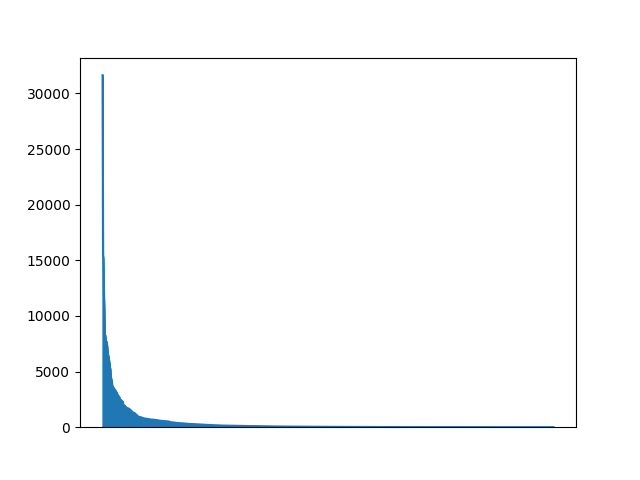

Fiction                    31638
Romance                    15495
Fantasy                    15046
Young Adult                11869
Contemporary               10520
Nonfiction                  8251
Adult                       8246
Novels                      7805
Mystery                     7702
Historical Fiction          7665
Audiobook                   7307
Classics                    6902
Adventure                   6452
Historical                  6383
Paranormal                  6030
Literature                  5836
Science Fiction             5374
Childrens                   5226
Thriller                    4587
Magic                       4248
Humor                       4227
History                     3685
Crime                       3675
Contemporary Romance        3624
Suspense                    3474
Urban Fantasy               3458
Middle Grade                3389
Chick Lit                   3358
Science Fiction Fantasy     3302
Supernatural                3196
Name: genr

In [124]:
print(f"There are {len(genres.drop_duplicates())} genres.")

plt.close()
ax = genres.value_counts().plot.area()
ax.get_xaxis().set_visible(False)
plt.show()

genres.value_counts().sort_values(ascending=False).head(30)

As we see, a similar pattern repeats.

## Authors
And again.

In [129]:
def to_list(string):
     return [x.strip() for x in string.split(",")]

authors = data["author"].map(to_list)  # the original column contains comma-separated strings. we want lists.
authors = authors.explode().dropna().astype("category")
authors

0                          Suzanne Collins
1                             J.K. Rowling
1              Mary GrandPré (Illustrator)
2                               Harper Lee
3                              Jane Austen
                       ...                
52475    Kim Richardson (Goodreads Author)
52476       Tom Pollack (Goodreads Author)
52476       John Loftus (Goodreads Author)
52476                            Jim Alves
52477      Misty Moncur (Goodreads Author)
Name: author, Length: 68704, dtype: category
Categories (34567, object): ['"Whoopie Pie" Pam Jarrell (Goodreads Author)', '#1-3)', '#4-5)', '(Goodreads Author)', ..., '高野苺', '麻枝 准', '黒星 紅白 (イラスト)', 'ﻳﻮﺳﻒ ﺣﻼﻕ (Translator)']

There are 34567 authors.


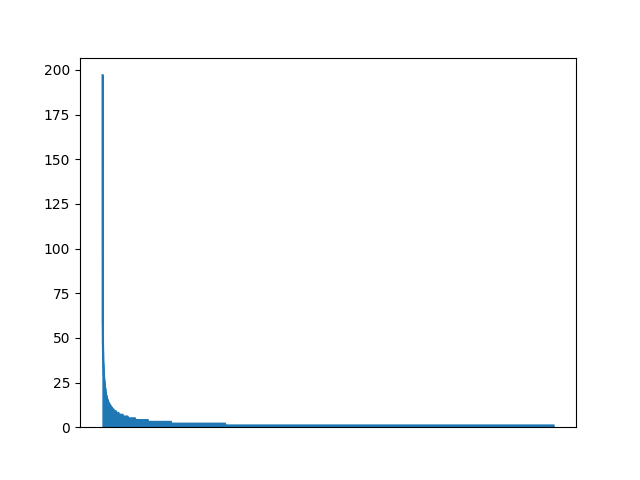

more…                                 197
Stephen King (Goodreads Author)       104
Nora Roberts (Goodreads Author)       103
James Patterson (Goodreads Author)     99
Agatha Christie                        88
Anonymous                              79
Erin Hunter                            74
Terry Pratchett                        67
Meg Cabot (Goodreads Author)           65
Mercedes Lackey                        62
J.D. Robb (Goodreads Author)           59
Carolyn Keene                          59
Karen Kingsbury (Goodreads Author)     57
Cassandra Clare (Goodreads Author)     55
Alex Archer (pseudonym)                54
Dean Koontz (Goodreads Author)         54
Arthur Conan Doyle                     53
Bella Forrest (Goodreads Author)       53
Neil Gaiman (Goodreads Author)         53
Lucian Bane (Goodreads Author)         52
Enid Blyton                            51
Anne McCaffrey                         50
Will Durant                            49
NOT A BOOK                        

In [130]:
print(f"There are {len(authors.drop_duplicates())} authors.")

plt.close()
ax = authors.value_counts().plot.area()
ax.get_xaxis().set_visible(False)
plt.show()

authors.value_counts().sort_values(ascending=False).head(30)

The fall is less severe this time. The tail seems heavier. 
We can also see that this column also needs some cleaning.